In [105]:
#import required packages
import pandas as pd #data processing, file I/O (e.g. pd.read_csv)
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.impute import SimpleImputer

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 10,7

In [106]:
import warnings
warnings.filterwarnings('ignore')

2. Exploring the given data (EDP)
Furthermore, in the following cells I will explore the dataset to gain an understanding of the type, quantity, and distribution of data in our dataset. I have used Pandas' built-in describe feature, as well as parameter histograms and a correlation matrix.


In [107]:
#importing the given dataset
df=pd.read_csv("account-defaults.csv")
#inspecting the data in segments
print(df.head())

   FirstYearDelinquency  AgeOldestIdentityRecord  AgeOldestAccount  \
0                     0                      NaN               NaN   
1                     0                    148.0             113.0   
2                     1                    200.0              70.0   
3                     0                    378.0              78.0   
4                     1                     37.0               NaN   

   AgeNewestAutoAccount  TotalInquiries  AvgAgeAutoAccounts  \
0                   NaN             0.0                 NaN   
1                 112.0             0.0               112.0   
2                   NaN             0.0                 NaN   
3                  32.0             0.0                49.0   
4                   NaN             0.0                 NaN   

   TotalAutoAccountsNeverDelinquent  WorstDelinquency  HasInquiryTelecomm  
0                               NaN               NaN                 0.0  
1                               1.0             

3. Anlysing
First, whats the problem? here we are trying to predict the column "FirstYearDelinquency" .The aim of modeling with this dataset is to be able to predict the probability that new accounts will become delinquent; When the value of 'FirstYearDelinquency'=1, it indicates that the new account went Delinquent in its first year and otherwise if the value is 0.

In [108]:
#exploring the given data set to gain information about the type,quantity and distribution of data in the given dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11250 entries, 0 to 11249
Data columns (total 9 columns):
FirstYearDelinquency                11250 non-null int64
AgeOldestIdentityRecord             11118 non-null float64
AgeOldestAccount                    9910 non-null float64
AgeNewestAutoAccount                6286 non-null float64
TotalInquiries                      10840 non-null float64
AvgAgeAutoAccounts                  6286 non-null float64
TotalAutoAccountsNeverDelinquent    6286 non-null float64
WorstDelinquency                    9933 non-null float64
HasInquiryTelecomm                  11174 non-null float64
dtypes: float64(8), int64(1)
memory usage: 791.1 KB


In [109]:
#check for missing data:So next we check the number of nulls / NaNs in the dataset and deal with them
#false implies column has no NAN
df.isnull().any()

FirstYearDelinquency                False
AgeOldestIdentityRecord              True
AgeOldestAccount                     True
AgeNewestAutoAccount                 True
TotalInquiries                       True
AvgAgeAutoAccounts                   True
TotalAutoAccountsNeverDelinquent     True
WorstDelinquency                     True
HasInquiryTelecomm                   True
dtype: bool

In [110]:
df.isnull().sum()

FirstYearDelinquency                   0
AgeOldestIdentityRecord              132
AgeOldestAccount                    1340
AgeNewestAutoAccount                4964
TotalInquiries                       410
AvgAgeAutoAccounts                  4964
TotalAutoAccountsNeverDelinquent    4964
WorstDelinquency                    1317
HasInquiryTelecomm                    76
dtype: int64

In [111]:
#total number of missing values in dataframe(filling with the mean values of the columns calculated)
df.isnull().sum().sum()

18167

### 3. Exploratory Data Analysis (EDA)
In our EDA, we'll perform operations such as checking for missing values although clearly our dataset has a lot of missing value, hence denoted as <b>NaN</b>. We will also check how the features are correlated and a lot more to get a clear understanding of our data.

In [112]:
# Lets check for Unique value counts across our dataset
print(df.nunique())

FirstYearDelinquency                  2
AgeOldestIdentityRecord             449
AgeOldestAccount                    444
AgeNewestAutoAccount                192
TotalInquiries                       10
AvgAgeAutoAccounts                  195
TotalAutoAccountsNeverDelinquent     16
WorstDelinquency                      6
HasInquiryTelecomm                    2
dtype: int64


In [113]:
df.shape

(11250, 9)

4. Summary Statistics of dataset

In [114]:
#summary statistics to help us understand the data better
print(df.describe())

       FirstYearDelinquency  AgeOldestIdentityRecord  AgeOldestAccount  \
count          11250.000000             11118.000000       9910.000000   
mean               0.353511               206.475625        125.134208   
std                0.478081               108.123056         78.909608   
min                0.000000                 1.000000          0.000000   
25%                0.000000               119.000000         74.000000   
50%                0.000000               209.000000        112.000000   
75%                1.000000               298.000000        164.000000   
max                1.000000               666.000000        656.000000   

       AgeNewestAutoAccount  TotalInquiries  AvgAgeAutoAccounts  \
count           6286.000000    10840.000000         6286.000000   
mean              50.958956        0.332196           70.737830   
std               37.586706        0.768580           34.810911   
min                0.000000        0.000000            1.000000  

In [115]:
#accounts that went deliquent
deliquent_accounts = df[df['FirstYearDelinquency'] == 1]
non_deliquent_accounts = df[df['FirstYearDelinquency'] == 0]

total_Counts = df['FirstYearDelinquency']

outlier_fraction = len(deliquent_accounts)/float(len(total_Counts))
percentage=outlier_fraction*100
print('Percentage : {}'.format(percentage))

print('deliquent accounts : {}'.format(len(df[df['FirstYearDelinquency'] == 1])))
print('non deliquent accounts in first year: {}'.format(len(df[df['FirstYearDelinquency'] == 0])))
print(' total number of accounts: {}'.format(len(df['FirstYearDelinquency'])))



Percentage : 35.35111111111111
deliquent accounts : 3977
non deliquent accounts in first year: 7273
 total number of accounts: 11250


Now we have to deal with missing values in all the variables because most of the models don’t work with missing data.
Missing values may not always be NaNs.Unpractical values in a dataset can also be considered missing data/misplaced data and should be dealt with accordinly

In [116]:
#replacing missng values of the columns with mean of available values
[df["AgeOldestIdentityRecord"].fillna(df["AgeOldestIdentityRecord"].mean(), inplace=True) for col in df.columns]
[df["AgeOldestAccount"].fillna(df["AgeOldestAccount"].mean(), inplace=True) for col in df.columns]
[df["AgeNewestAutoAccount"].fillna(df["AgeNewestAutoAccount"].mean(), inplace=True) for col in df.columns]
[df["TotalInquiries"].fillna(df["TotalInquiries"].mean(), inplace=True) for col in df.columns]
[df["AvgAgeAutoAccounts"].fillna(df["AvgAgeAutoAccounts"].mean(), inplace=True) for col in df.columns]
[df["TotalAutoAccountsNeverDelinquent"].fillna(df["TotalAutoAccountsNeverDelinquent"].mean(), inplace=True) for col in df.columns]
[df["WorstDelinquency"].fillna(df["WorstDelinquency"].mean(), inplace=True) for col in df.columns]
[df["HasInquiryTelecomm"].fillna(df["HasInquiryTelecomm"].mean(), inplace=True) for col in df.columns]


[None, None, None, None, None, None, None, None, None]

Distribution analysis

Now that we are familiar with basic data characteristics, we will study distribution of various variables.


Lets start by plotting the histogram of our data

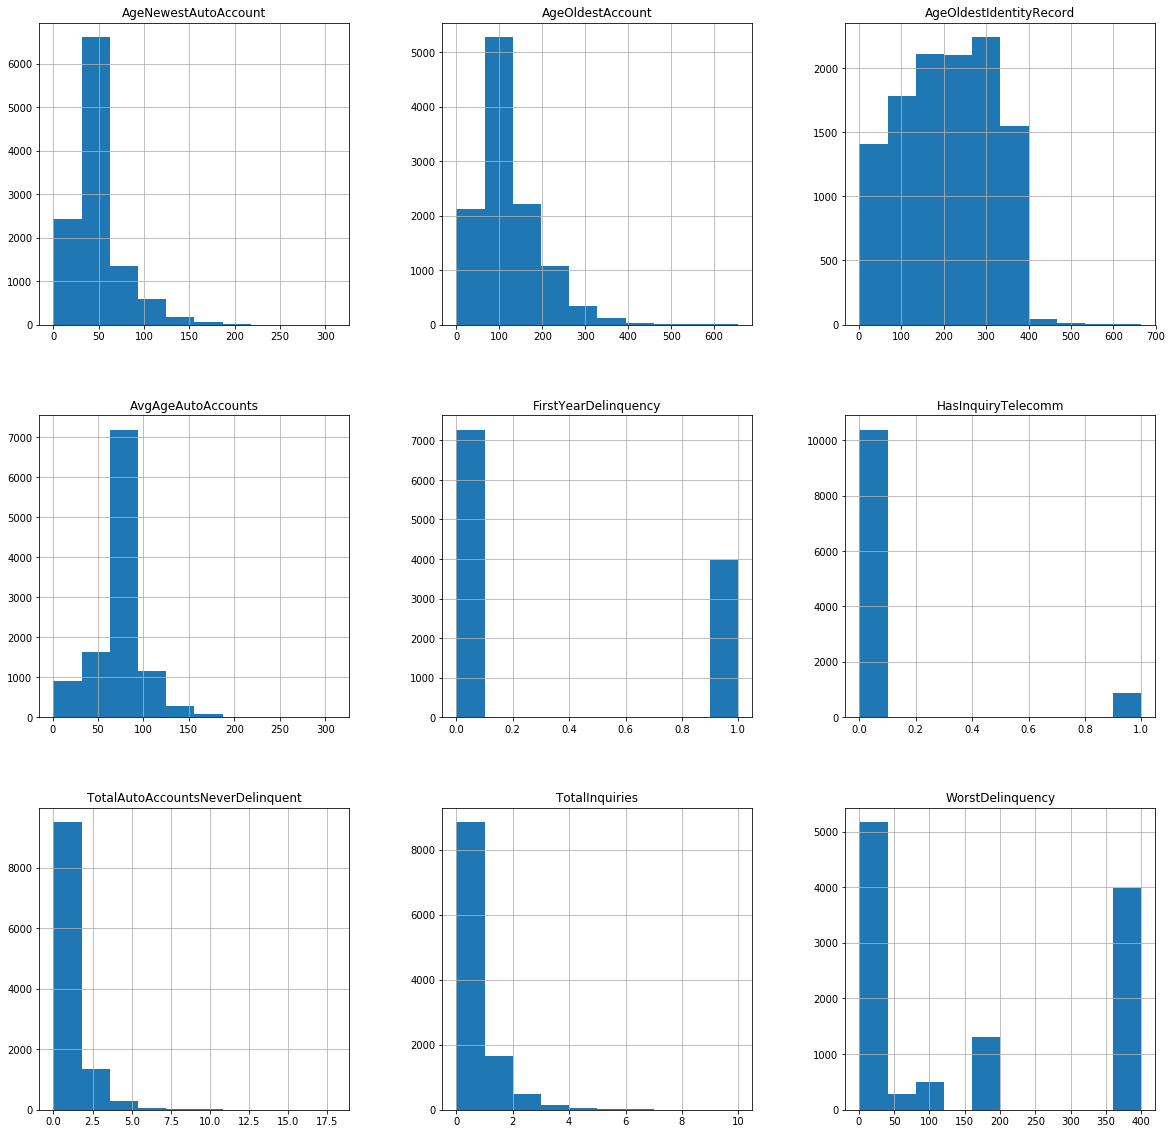

In [117]:
df.hist(figsize = (20, 20))
plt.show()

Here we observe that FirstYearDelinquency and WorstDelinquency has many extreme values. more values are concentrated to 1 as compared to the other features or varables



###Visualising the dataset

##### Accessing the relationships between the different  variables

In [118]:
df.columns

Index(['FirstYearDelinquency', 'AgeOldestIdentityRecord', 'AgeOldestAccount',
       'AgeNewestAutoAccount', 'TotalInquiries', 'AvgAgeAutoAccounts',
       'TotalAutoAccountsNeverDelinquent', 'WorstDelinquency',
       'HasInquiryTelecomm'],
      dtype='object')

##### Next,  we will generate a point plot to display the trend of loan deliquency based on number of months since the first record was reported by a national credit source, number of months since the oldest account was opened, and number of months since the most recent auto loan or lease account was opened,  all against Worst Deliquency.

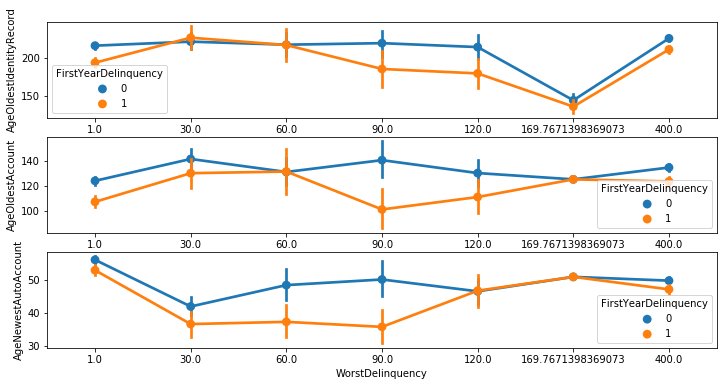

In [119]:
fig, ax =plt.subplots(3,1, figsize=(12,6))
sns.pointplot(y="AgeOldestIdentityRecord", x ="WorstDelinquency",data=df,ax=ax[0],hue="FirstYearDelinquency")
sns.pointplot(y="AgeOldestAccount", x ="WorstDelinquency",data=df,ax=ax[1],hue="FirstYearDelinquency")
sns.pointplot(y="AgeNewestAutoAccount", x ="WorstDelinquency",data=df,ax=ax[2],hue="FirstYearDelinquency")
plt.show()

AttributeError: 'AxesSubplot' object has no attribute 'map'

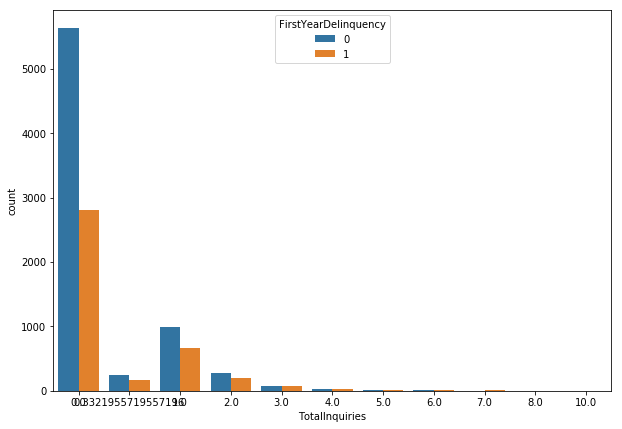

In [120]:
ax = sns.countplot(df['TotalInquiries'], data = df, hue = 'FirstYearDelinquency')
ax.map(plt.hist, 'TotalInquiries', bins=20)


In [ ]:
ax = sns.countplot(df['HasInquiryTelecomm'], data = df, hue = 'FirstYearDelinquency')


While exploring the data,  a few problems where found in the data set, these problems need to solved before the data is ready for a good model. Here are the problems, we are already aware of:

1. There are missing values in some variables. 
2. The some data has exteme values.

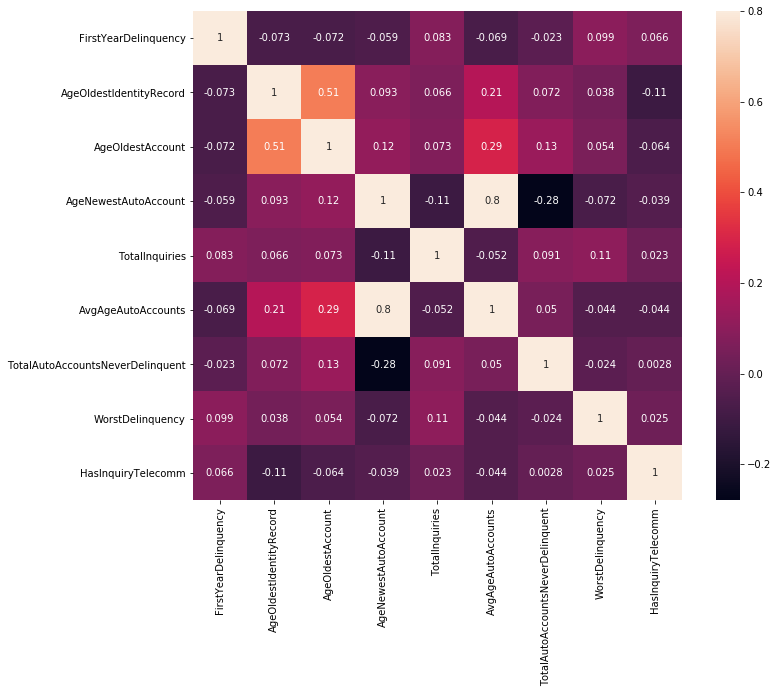

In [121]:
# Correlation matrix: see how different features are correlated with each other
corrmatrix = df.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmatrix, vmax = .8, square = True,annot=True)
plt.show()

From the heatmap, the following features are the most influencing for the first year deliquency
       1 HasInquiryTelecomm
       2 WorstDelinquency
       3 TotalInquiries
       

##BUILDING A PREDICTIVE MODEL, USING REGRESSION

In [122]:
#Splitting  the column of our target variable(FirstYearDelinquency) ie 1 or 0 (binary)
Y = np.array(df['FirstYearDelinquency'])
x = np.array(df.drop(['FirstYearDelinquency'], 1))

In [123]:
Y

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [124]:
#importing necessary packages for buidling our predictive model
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import feature_selection as fs
from sklearn import metrics
import sklearn.model_selection as ms
import sklearn.metrics as sklm

## Feature Engineering and selection

In [125]:
# Print shapes
print(x.shape)

#Define the variance and fit the threshold to the feature array
var = fs.VarianceThreshold(threshold=(.7 * (1 - .7)))
red_features = var.fit_transform(x)

#Print shape for the transformed features
print(var.get_support())
print(red_features.shape)

(11250, 8)
[ True  True  True  True  True  True  True False]
(11250, 7)


Select K-Best Features

In [129]:
import numpy.random as nr
# Set folds for nested cross validation
nr.seed(988)
feature_folds = ms.KFold(n_splits=10, shuffle = True)

## Define the model
logistic_mod = linear_model.LogisticRegression(C = 10, class_weight = {0:0.45, 1:0.55}) 

## Perform feature selection by Cross-Validation with high variance features only
nr.seed(6677)
selector = fs.RFECV(estimator = logistic_mod, cv = feature_folds,
                      scoring = 'roc_auc')
selector = selector.fit(red_features, Y)
selector.support_ 
selector.ranking_

array([1, 1, 1, 1, 1, 1, 1])

In [90]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size = 0.7, random_state = 42)

print("X-Train " , x_train.shape)
print("X-Test " , x_test.shape)
print("Y-Train " , y_train.shape)
print("Y-Train " , y_test.shape)

X-Train  (3375, 8)
X-Test  (7875, 8)
Y-Train  (3375,)
Y-Train  (7875,)


In [91]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

### Building the prediction Model(s)

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import itertools

In [93]:
clf = LogisticRegression()
clf.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [94]:
print(clf.intercept_)
print(clf.coef_)

[-0.61629776]
[[-0.08022407 -0.09770305 -0.20907509  0.17331742  0.04652005 -0.13685088
   0.17741138  0.1321904 ]]


### Predict class probabilities on out-of-sample data

In [95]:
probabilities = clf.predict_proba(x_test)
print(probabilities[:15,:])

[[0.61579006 0.38420994]
 [0.60401913 0.39598087]
 [0.76905666 0.23094334]
 [0.71908764 0.28091236]
 [0.7337818  0.2662182 ]
 [0.52680755 0.47319245]
 [0.65234323 0.34765677]
 [0.80395002 0.19604998]
 [0.72474232 0.27525768]
 [0.6639072  0.3360928 ]
 [0.44438858 0.55561142]
 [0.59148822 0.40851178]
 [0.57651309 0.42348691]
 [0.49628592 0.50371408]
 [0.50569171 0.49430829]]


Scoring and evaluating the  model



In [96]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])
scores = score_model(probabilities, 0.5)
print(np.array(scores[:30]))
print(y_test[:30])

[0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0]


In [97]:
def print_metrics(labels, scores):
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy  %0.2f' % sklm.accuracy_score(labels, scores))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])


    
print_metrics(y_test, scores)

                 Confusion matrix
                 Score positive    Score negative
Actual positive      4880               217
Actual negative      2546               232

Accuracy  0.65
 
           Positive      Negative
Num case     5097          2778
Precision    0.66          0.52
Recall       0.96          0.08
F1           0.78          0.14


In [98]:
clf = LogisticRegression(C=1.0, class_weight = {0:0.45, 1:0.55}) 
clf.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight={0: 0.45, 1: 0.55}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [99]:
probabilities = clf.predict_proba(x_test)
print(probabilities[:15,:])

[[0.56782725 0.43217275]
 [0.55584009 0.44415991]
 [0.73100283 0.26899717]
 [0.67727665 0.32272335]
 [0.69218157 0.30781843]
 [0.47611404 0.52388596]
 [0.60557376 0.39442624]
 [0.76986532 0.23013468]
 [0.68345726 0.31654274]
 [0.61797234 0.38202766]
 [0.39635004 0.60364996]
 [0.54184898 0.45815102]
 [0.52644701 0.47355299]
 [0.44626696 0.55373304]
 [0.45601596 0.54398404]]


In [100]:
scores = score_model(probabilities, 0.5)
print_metrics(y_test, scores)

                 Confusion matrix
                 Score positive    Score negative
Actual positive      4555               542
Actual negative      2294               484

Accuracy  0.64
 
           Positive      Negative
Num case     5097          2778
Precision    0.67          0.47
Recall       0.89          0.17
F1           0.76          0.25
